<a href="https://colab.research.google.com/github/saparbayev-azizbek-12/bi-and-ai-talents-dl/blob/main/lesson-7/lesson_7_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tarfile

annotations_path = "/content/drive/MyDrive/dl_course/lesson-7/data/annotations.tar.gz"
images_path = "/content/drive/MyDrive/dl_course/lesson-7/data/images.tar.gz"

with tarfile.open(annotations_path, "r:gz") as tar:
  tar.extractall("annotations_output")

with tarfile.open(images_path, "r:gz") as tar:
  tar.extractall("images_output")

/tmp/ipython-input-960471159.py:7: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall("annotations_output")
/tmp/ipython-input-960471159.py:10: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall("images_output")


In [ ]:
import os
import numpy as np
from PIL import Image

images = []
labels = []
target_size = (256, 256)
pet_images_path = "/content/images_output/images"

for filename in sorted(os.listdir(pet_images_path)):
  if filename.endswith(".jpg"):
    print(filename)
    name = os.path.splitext(filename)[0]
    labels.append(name.rsplit("_", 1)[0])
    image_path = os.path.join(pet_images_path, filename)
    img = Image.open(image_path).convert("RGB")
    resized_img = img.resize(target_size, Image.BILINEAR)
    images.append(np.asarray(resized_img))

Streaming output truncated to the last 5000 lines.
Sphynx_9.jpg
Sphynx_90.jpg
Sphynx_91.jpg
Sphynx_92.jpg
Sphynx_93.jpg
Sphynx_94.jpg
Sphynx_95.jpg
Sphynx_96.jpg
Sphynx_98.jpg
Sphynx_99.jpg
american_bulldog_10.jpg
american_bulldog_100.jpg
american_bulldog_101.jpg
american_bulldog_102.jpg
american_bulldog_103.jpg
american_bulldog_104.jpg
american_bulldog_105.jpg
american_bulldog_106.jpg
american_bulldog_107.jpg
american_bulldog_108.jpg
american_bulldog_109.jpg
american_bulldog_11.jpg
american_bulldog_110.jpg
american_bulldog_111.jpg
american_bulldog_112.jpg
american_bulldog_113.jpg
american_bulldog_114.jpg
american_bulldog_115.jpg
american_bulldog_116.jpg
american_bulldog_117.jpg
american_bulldog_118.jpg
american_bulldog_119.jpg
american_bulldog_12.jpg
american_bulldog_120.jpg
american_bulldog_121.jpg
american_bulldog_122.jpg
american_bulldog_123.jpg
american_bulldog_124.jpg
american_bulldog_125.jpg
american_bulldog_126.jpg
american_bulldog_127.jpg
american_bulldog_128.jpg
american_bull

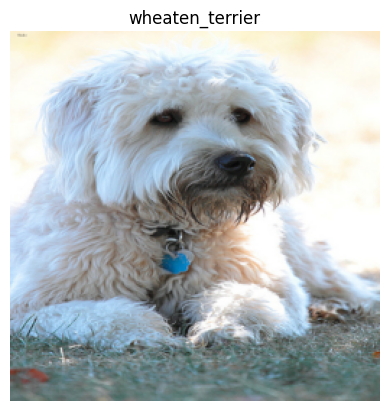

In [ ]:
import matplotlib.pyplot as plt

idx = 7000

plt.imshow(images[idx])
plt.title(labels[idx])
plt.axis("off")
plt.show()

In [ ]:
import torch
from torch.utils.data import Dataset

class PetsDataset(Dataset):
  def __init__(self, images_path, target_size=(256, 256)):
    self.images_path = images_path
    self.target_size = target_size
    self.labels = []

    for filename in sorted(os.listdir(self.images_path)):
      if filename.endswith(".jpg"):
        self.labels.append(filename)

  def __getitem__(self, idx):
    image_path = os.path.join(self.images_path, self.labels[idx])
    img = Image.open(image_path).convert("RGB")
    resized_img = img.resize(self.target_size, Image.BILINEAR)

    img_array = np.asarray(resized_img).transpose((2, 0, 1))
    img_tensor = torch.tensor(img_array, dtype=torch.float32) / 255
    label = self.labels[idx].rsplit("_", 1)[0]

    return img_tensor, label

  def __len__(self):
    return len(self.labels)

In [ ]:
pets = PetsDataset(pet_images_path)

In [ ]:
len(pets)

7390

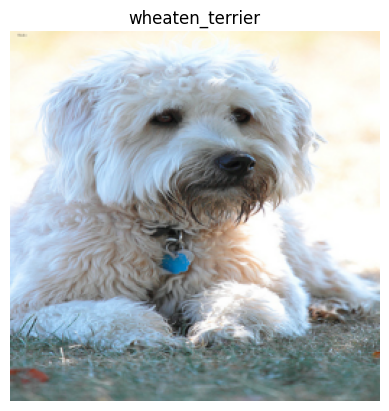

In [ ]:
idx = 7000
img, label = pets[idx]
type(img)
plt.imshow(np.array(img).transpose(1, 2, 0))
plt.title(label)
plt.axis("off")
plt.show()